In [1]:
import sympy as sp
import numpy as np
from scipy.integrate import quad
from scipy.stats import norm
import matplotlib.pyplot as plt
from sympy.utilities import lambdify
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from sympy import solve

In [2]:
sp.init_printing()

In [3]:
x = sp.Symbol('x', real=True)
k = sp.Symbol('k', real=True, positive=True)
a = sp.Symbol('a', real=True)
m = sp.Symbol('m', real=True, positive=True)
t = sp.Symbol('t', real=True, positive=True)
h = sp.Symbol('hbar', real=True, positive=True)
n = sp.Symbol('n', integer=True, nonzero=True)
psi = sp.Function('psi')

x, k, a, m, t, h, n, psi(x)

$$\frac{d^2\psi(x)}{dx^2} = -k^2\psi(x)$$

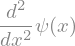

In [4]:
psi(x).diff(x, x)

In [5]:
-k**2 * psi(x)

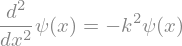

In [6]:
eq = sp.Eq(psi(x).diff(x, x), -k**2 * psi(x))
eq

In [7]:
sp.dsolve(eq, psi(x))

In [8]:
sp.dsolve(eq, psi(x), ics={psi(0): 0, psi(a): 0})

In [9]:
sol = sp.dsolve(eq, psi(x), ics={psi(0): 0})
sol

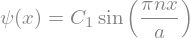

In [10]:
sol = sol.subs(k, n * sp.pi / a)
sol

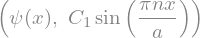

In [11]:
sol.lhs, sol.rhs

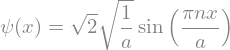

In [12]:
sol = sol.subs(sp.Symbol('C1'), sp.sqrt(2 / a))
sol

$$<\omega>=\int \Psi^{*} \hat{\omega} \Psi\ dx$$
W stanie stacjonarnym
$$<\omega>=\int \psi^{*} \hat{\omega} \psi\ dx$$

$$\hat{x}=x$$

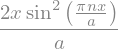

In [13]:
sol.rhs * x * sol.rhs

In [14]:
x1 = sp.integrate(sol.rhs * x * sol.rhs, (x, 0, a)).simplify()
x1

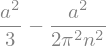

In [15]:
x2 = sp.integrate(sol.rhs * x**2 * sol.rhs, (x, 0, a)).simplify()
x2

$$\sigma_X^2=<x^2>-<x>^2$$

$$<p>=?$$
$$<p^2>=?$$
$$\sigma_P^2=?$$

$$\sigma_X \sigma_P \geq \frac{\hbar}{2}$$

Spradzić, czy ta zasada nieoznaczoności jest faktycznie dla tej studni potencjału spełniona.

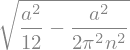

In [16]:
sigmax = sp.sqrt(x2 - x1**2)
sigmax


$$\sigma_X=\sqrt{\frac{a^2}{12}-\frac{a^2}{2\pi^2n^2}}$$

In [17]:
i = sp.I
i

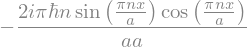

In [18]:
sol.rhs * -i * h * sol.rhs.diff(x)

In [19]:
p1 = sp.integrate(sol.rhs * -i * h * sol.rhs.diff(x), (x, 0, a))
p1

$$<p>=0$$

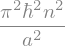

In [20]:
p2 = sp.integrate(sol.rhs * -h**2 * sol.rhs.diff(x, x), (x, 0, a))
p2

$$<p^2>=\frac{\pi^2*\hbar^2*n^2}{a^2}$$

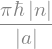

In [24]:
sigmap = sp.sqrt(p2 - p1**2)
sigmap

$$\sigma_P=\frac{\pi\hbar\left | n \right |}{\left | a \right |}$$

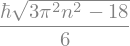

In [26]:
sigmaxp = (sigmax * sigmap).simplify()
sigmaxp

$$\sigma_X\sigma_P=\frac{\hbar\sqrt{3\pi ^{2}n^{2}-18}}{6}\geq \frac{\hbar}{2}$$
Po podzieleniu obywdu stron przez $\hbar$ otrzymujemy:



$$\frac{\sqrt{3\pi ^{2}n^{2}-18}}{6}\geq \frac{1}{2}$$
Wstawiając za $n=1$ (najmniejsza możliwa wartość) otrzymamy nierówność:

In [37]:
minn = np.sqrt(3*np.pi*np.pi-18)/6
minn


$$0,5679\geq 0,5$$
Widzimy, że dla $n=1$ nierówność jest prawdziwa, zatem zasada nieoznaczoności została spełniona i będzie spełniona dla każdego $n$, co spełnia założenia zasady nieoznaczoności.